In [259]:
%matplotlib inline
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

size = 5
kernel_template = np.hstack((np.ones((1,int((size-1)/2)+1)),np.zeros((1,int((size-1)/2)))))
print("=====")
print(kernel_template)
pad = np.zeros((1,size))
print("=====")
print(pad)
kernel = np.tile(kernel_template, (int((size-1)/2)+1,1))
print("=====")
print(kernel)
kernel = np.vstack((kernel, np.tile(pad, (int((size-1)/2),1))))
print("=====")
print(kernel)
average = kernel/np.sum(kernel)
print(average)


kernelstack = np.empty((4,size,size)) 
kernelstack[0] = average			              # a
kernelstack[1] = np.fliplr(kernel)	        # b
kernelstack[2] = np.flipud(kernel)	        # c
kernelstack[3] = np.fliplr(kernelstack[2])	# d
print("====")
print(kernelstack)
# [ a  a  ab   b  b]
# [ a  a  ab   b  b]
# [ac ac abcd bd bd]
# [ c  c  cd   d  d]
# [ c  c  cd   d  d]

=====
[[1. 1. 1. 0. 0.]]
=====
[[0. 0. 0. 0. 0.]]
=====
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]]
=====
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
====
[[[0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.11111111 0.11111111 0.11111111 0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.         0.         1.         1.         1.        ]
  [0.         0.         1.         1.         1.        ]
  [0.         0.         1.         1.         1.        ]
  [0.         0.      

In [239]:
def conv2d(image, kernel):
    m, n = kernel.shape
    # pad = np.zeros((image.shape[0] + m-1, image.shape[1] + n-1, 3))
    # pad[(m-1)/2:-(n-1)/2, (m-1)/2:-(n-1)/2] = image
    # image = image[int((m-1)/2):-int((n-1)/2), int((m-1)/2):-int((n-1)/2)]
    # print(kernel.shape)
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y ,x))
        # print (new_image.shape)
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
        pad = np.zeros((new_image.shape[0] + m-1, new_image.shape[1] + n-1))
        pad[int((m-1)/2):-int((n-1)/2), int((m-1)/2):-int((n-1)/2)] = new_image
        new_image = pad
    return new_image

def Kuwahara(image, size):

    image = image.astype(np.float64)
    output = np.zeros(image.shape)
    mean = np.zeros([4, image.shape[0],image.shape[1]])
    std = mean.copy()

    kernel_template = np.hstack((np.ones((1,int((size-1)/2)+1)),np.zeros((1,int((size-1)/2)))))
    # =====
    # [[1. 1. 1. 0. 0.]]
    pad = np.zeros((1,size))
    # =====
    # [[0. 0. 0. 0. 0.]]
    kernel = np.tile(kernel_template, (int((size-1)/2)+1,1))
    # =====
    # [[1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]]
    kernel = np.vstack((kernel, np.tile(pad, (int((size-1)/2),1))))
    # =====
    # [[1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [1. 1. 1. 0. 0.]
    # [0. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0.]]
    # =====
    average = kernel/np.sum(kernel)
    # =====
    # [[0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.11111111 0.11111111 0.11111111 0.         0.        ]
    # [0.         0.         0.         0.         0.        ]
    # [0.         0.         0.         0.         0.        ]]
    # ====
    
    kernelstack = np.empty((4,size,size)) 
    kernelstack[0] = average			              # a
    kernelstack[1] = np.fliplr(average)	        # b
    kernelstack[2] = np.flipud(average)	        # c
    kernelstack[3] = np.fliplr(kernelstack[2])	# d
    
    # [ a  a  ab   b  b]
    # [ a  a  ab   b  b]
    # [ac ac abcd bd bd]
    # [ c  c  cd   d  d]
    # [ c  c  cd   d  d]

    for i in range(4):
        mean[i] = conv2d(image, kernelstack[i]) 	                 # mean 
        std[i] = conv2d(image**2, kernelstack[i]) - mean[i]**2 		 # variance         
	
    indices = np.argmin(std,0) 
    
    for i in range(image.shape[0]):
        for k in range(image.shape[1]):
            output[i,k] = mean[indices[i,k], i,k]

    return output

In [240]:


def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    # print(mx)
    if mx == mn:
        h = 0.0
    elif mx == r:
        h = 60 * ((g - b)/df % 6)
        
    elif mx == g:
        h = 60 * ((b - r)/df + 2)
        
    elif mx == b:
        h = 60 * ((r - g)/df + 4)
        
    if mx == 0.0:
        s = 0.0
    else:
        s = (df/mx)
    v = mx
    return h, s, v

def hsv_to_rgb(h, s, v):
    
    d = h / 60
    hi = int(d % 6)
    f = d - hi
    l = v * (1 - s)
    m = v * (1 - f * s)
    n = v * (1 - (1 - f) * s)
    
    if 0.0 <= h < 60.0:
        return v, n, l
    if 60.0 <= h < 120.0:
        return m, v, l
    if 120.0 <= h < 180.0:
        return l, v, n
    if 180.0 <= h < 240.0:
        return l, m, v
    if 240.0 <= h < 300.0:
        return n, l, v
    if 300.0 <= h < 360.0:
        return v, l, m

        

In [251]:

original = matplotlib.image.imread('test.jpg')
original = original[::7, ::7]
print(original.shape)
imgage = original
size = 5
pad_size = int((size -1)/2)
pad = np.zeros((original.shape[0] + size-1, original.shape[1] + size-1, 3))
pad[pad_size:-pad_size, pad_size:-pad_size] = original
imgage = pad

# original =(original[:, :, :3]).astype('uint8')
r,g,b = imgage[:,:,0], imgage[:,:,1], imgage[:,:,2]

r = r.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)
g = g.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)
b = b.reshape(imgage.shape[0]*imgage.shape[1]).astype(float)

h,s,v = [],[],[]
for idx, (ir,ig,ib) in enumerate(zip(list(r),list(g),list(b))):
  # print(ir)
  i_h,i_s,i_v = rgb_to_hsv(ir,ig,ib)
  h.append(i_h)
  s.append(i_s)
  v.append(i_v)


# r = Kuwahara(r,size)
# g = Kuwahara(g,size)
# b = Kuwahara(b,size)

h,s,v = np.array(h).reshape((-1, 1)), np.array(s).reshape((-1, 1)),np.array(v).reshape((-1, 1))
# print(h.shape)
h = h.reshape( (imgage.shape[0], imgage.shape[1]) )
s = s.reshape( (imgage.shape[0], imgage.shape[1]) )
v = v.reshape( (imgage.shape[0], imgage.shape[1]) )
# print(h.shape)
h = Kuwahara(h,size)
s = Kuwahara(s,size)
v = Kuwahara(v,size)

h_ = h.reshape(imgage.shape[0]*imgage.shape[1])
s_ = s.reshape(imgage.shape[0]*imgage.shape[1])
v_ = v.reshape(imgage.shape[0]*imgage.shape[1])

for idx, (i_h, i_s, i_v) in enumerate(zip(list(h_),list(s_),list(v_))):
  
  ir, ig, ib = hsv_to_rgb(i_h, i_s, i_v )
  # print(ir, ig, ib)
  r[idx] = ir*255.0
  g[idx] = ig*255.0
  b[idx] = ib*255.0


(293, 220, 3)


In [252]:
# r = r.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
# g = g.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
# b = b.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
print(r[40:70])
r_ = r.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
g_ = g.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')
b_ = b.reshape( (imgage.shape[0], imgage.shape[1]) ).astype('uint8')

# print(r)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


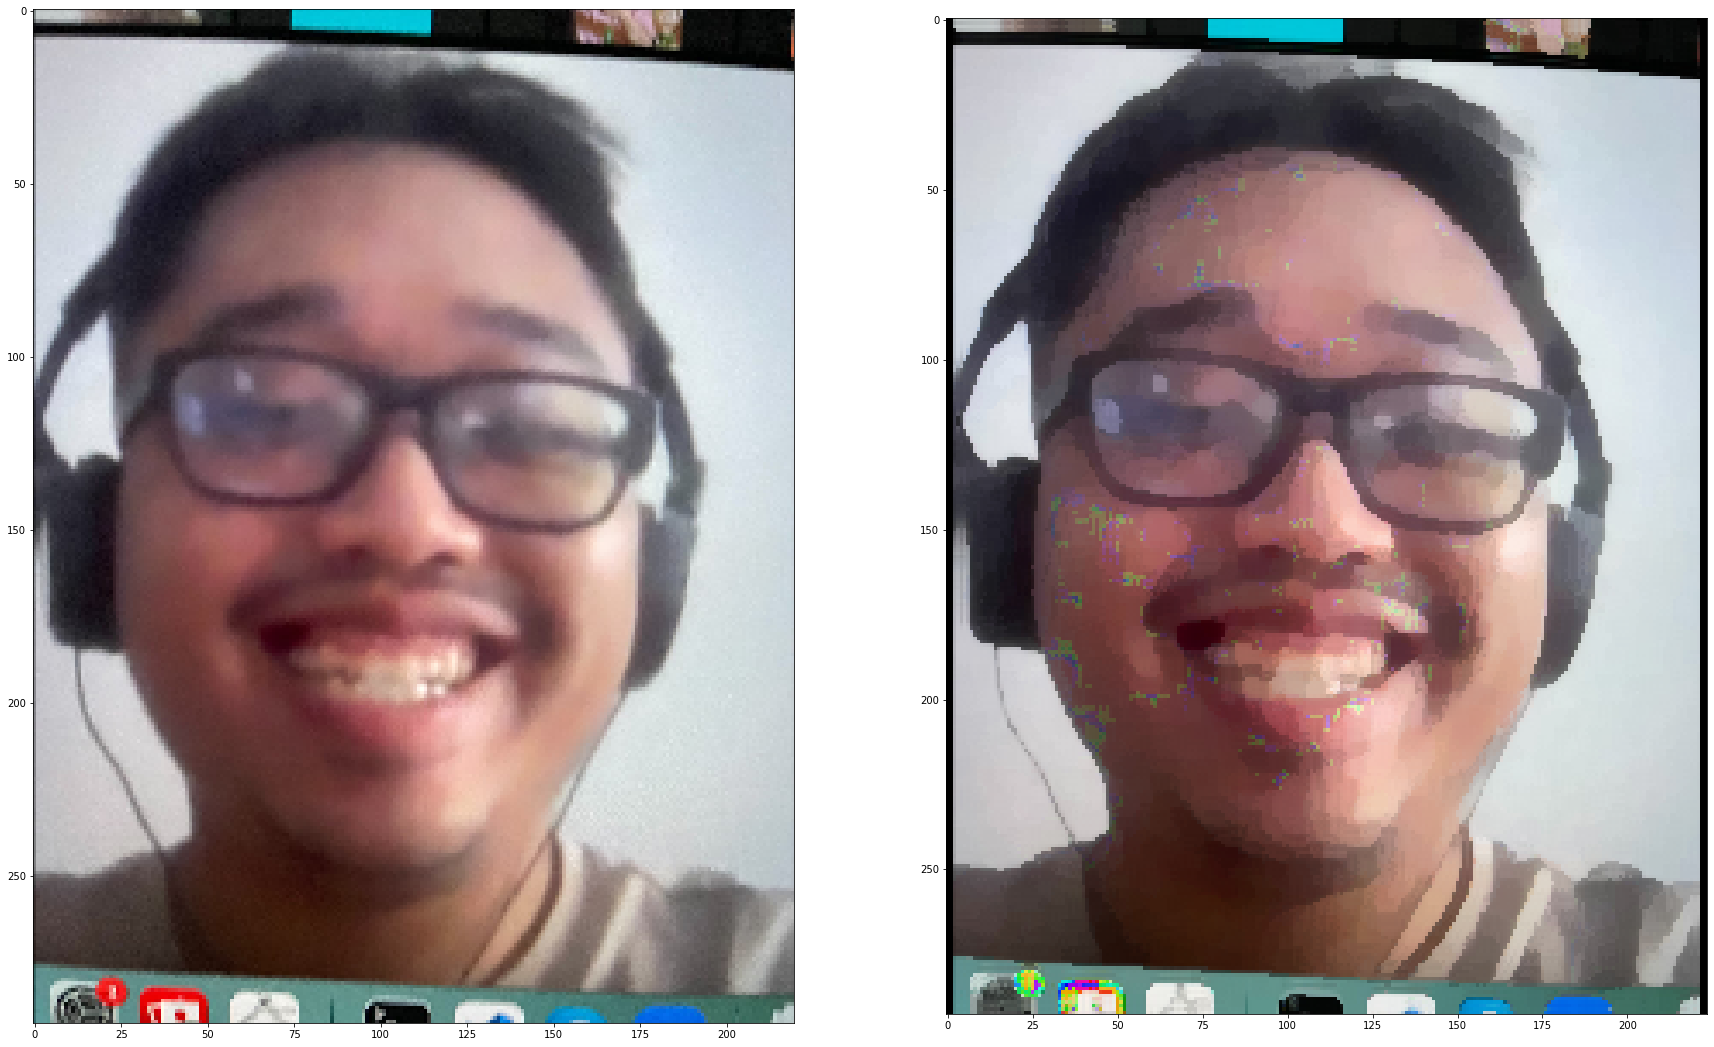

In [258]:
%matplotlib inline
output = np.zeros(original.shape)
pad = int((size-1)/2)
output = np.dstack((r_[pad:-pad], g_[pad:-pad], b_[pad:-pad]))
# output = np.dstack((h[pad:-pad], s[pad:-pad], v[pad:-pad]))

# output[:,:,0], output[:,:,1], output[:,:,2] = r,g,b
fig = plt.figure(figsize=(30, 60))
# fig.figure(figsize=(10, 20)
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(output)
ax2 = fig.add_subplot(1,2,1)
ax2.imshow(original)